## Regions

subset of discrete plane: $R \subseteq \mathbb{Z} ^{2}$

$\chi_R(r,c) = 1$ for $(r,c)^T \in R$

regions as binary picture

#### Problem: inefficient memory usage: $O(wh)$ at least width * height

#### Solution: store runs of each row (Sehnen)
- store beginning and end of each run
- sort runs (row, beginning column)

- restrict operations to regions of interest (ROI) (Definitionsbereiche)
- processing only on one ROI
- image object (Bildobject) consists of region and an arbitrary number of gray scale channels, e.g. 3 for colored images

## Global Thresholding (Schwellwertoperation)

- simplest and most common segmentation algorithm


- $ S = \{(r,c)^T \in R \mid  g_{min} \leq f_{r,c} \leq g_{max} \} $


- Problem:
    - if illumination changes over the image (Helligkeitsverlauf): Shading-Correction (Shading-Korrektur)
    - if illumination or appearance of object changes: Contrast normalisation, brightness adjustment
    
### Other possibility to determine threshold (Schwellwerte)
- histogram of the picture
- assumption: object and background are significantly different
    - two maxima should be visible one of the being the background and the other being the object
    
- problem: multiple minima exist, not clear which one we're looking for
- smoothen the histogram

original picture


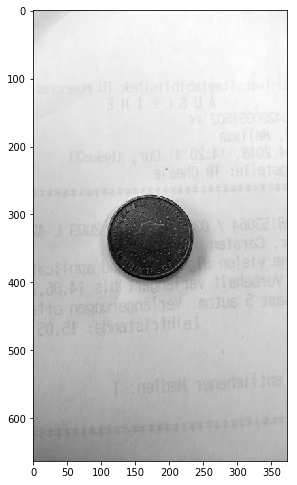

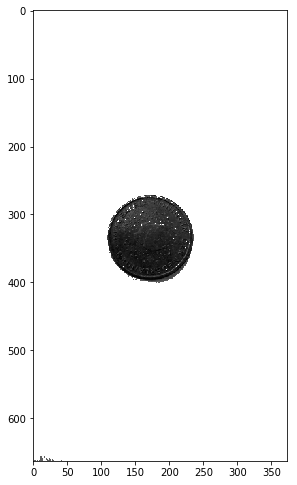

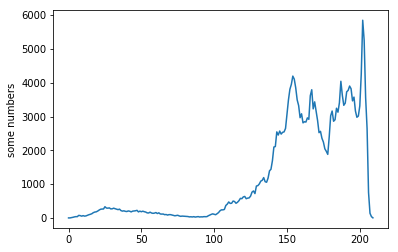

In [4]:
import img_reader as rd
import numpy as np

img = rd.read_gray("images/03-coin.jpg")
print("original picture")
rd.show_img(img)

img2 = np.array(img)
#img2[img2 < 60] = 0
img2[img2 >= 100] = 255
rd.show_img(img2)
rd.show_histo(img)

### Problem: Not evenly lit
- find better background or more distinct coin

original picture


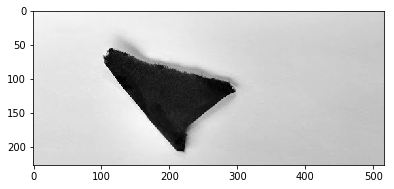

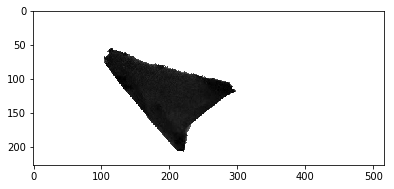

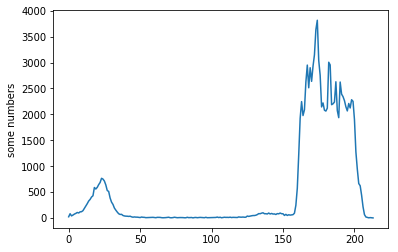

smoothen histogram


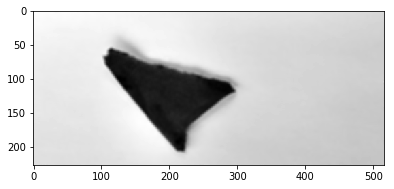

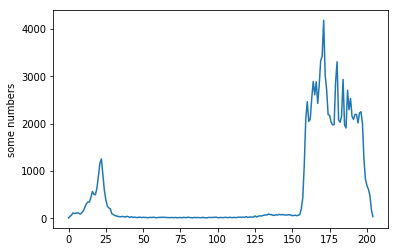

In [13]:
import img_reader as rd
import numpy as np

img = rd.read_gray("images/03-cloth.jpg")
print("original picture")
rd.show_img(img)

img2 = np.array(img)
#img2[img2 < 60] = 0
img2[img2 >= 100] = 255
rd.show_img(img2)
rd.show_histo(img)

img_smooth = rd.get5x5_mean(img)
print("smoothen histogram")
rd.show_img(img_smooth)
rd.show_histo(img_smooth)

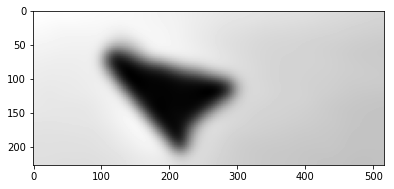

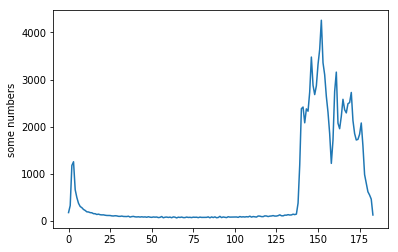

In [15]:
from scipy.ndimage.filters import gaussian_filter

blurred = gaussian_filter(img, sigma=10)

rd.show_img(blurred)
rd.show_histo(blurred)

### Better, but illumination far from being optimal

## Dynamic Thresholding

Problem
- sometimes no global threshold exists
- no common background

Solution
- determine local background via smoothening operations (Glättungsoperatoren)
- e.g. mean filter, Gaussian filter


<b>Dynamic thresholding</b>: operation of comparing the image to its local background

Original Image: $f_{r,c}$


Smoothen Image: $g_{r,c}$

For bright objects: $ S = \{ (r,c)^T \in R \mid f_{r,c} - g_{r,c} \geq g_{diff} \}$

For dark objects: $ S = \{ (r,c)^T \in R \mid f_{r,c} - g_{r,c} \leq - g_{diff} \}$

original picture


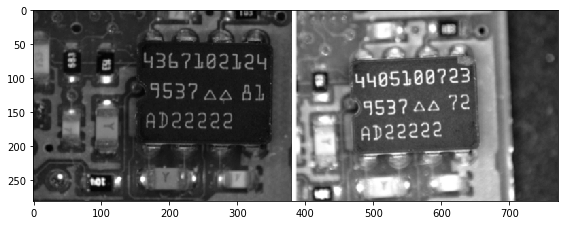

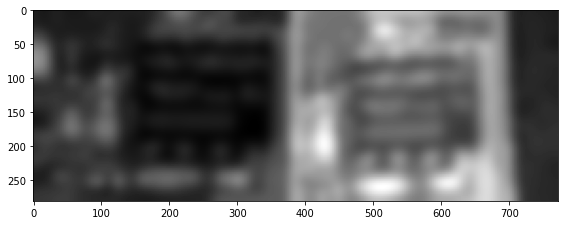

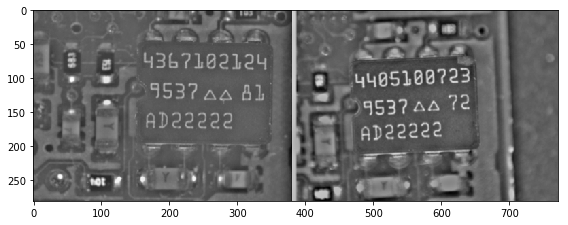

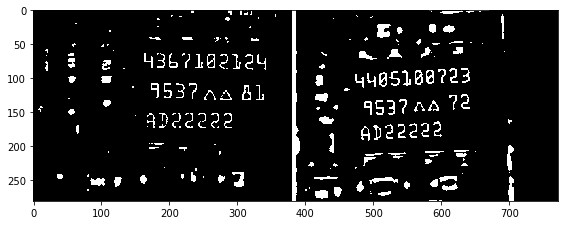

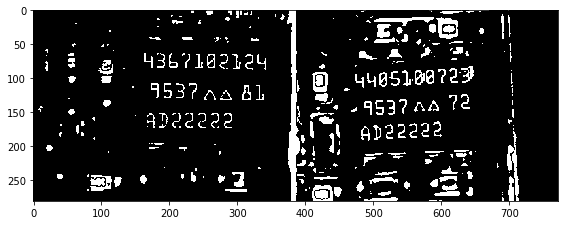

In [36]:
from scipy.ndimage.filters import gaussian_filter

img = rd.read_gray("images/03-chips.jpg")
print("original picture")
rd.show_img(img)



blurred = gaussian_filter(img, sigma=10)

rd.show_img(blurred)

# filter bright objects
diff = img - blurred
rd.show_img(diff)
diff[diff > 40] = 255
diff[diff <= 40] = 0
rd.show_img(diff)

diff = np.absolute(img - blurred)
diff[diff > 40] = 255
diff[diff <= 40] = 0
rd.show_img(diff)

### Problem: If object changes its size, the gray value difference between object and background changes significantly as well

We need an algorithm that tolerates variations (slight errors are tolerable)

## Variation Model

tolerable variations: $v_{r,c}$

$S = \{ (r,c)^T \in R \mid | f_{r,c} - g_{r,c} | \geq v_{r,c} \}$

mean: 
$m_{r,c} = \frac{1}{n} \sum_{i=1}^{n} g_{r,c;i}$


variance:
$s_{r,c} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (g_{r,c;i} - m_{r,c})^2}$

## Connected Components (Zusammenhangskomponenten)

- Threshold operations create a singular region containing multiple objects
- determine objects by splitting region into connected components

#### Possible definitions of connectivity (Art der Nachbarschaft)
- 4-connectivity
    - for regions (foreground)
- 8-connectivity
    - for complement (background)

## Feature Extraction (Merkmalsextraktion)

- features describe characteristic props of regions
- Region Features (Regionenmerkmale aka Formmerkmale) describe the geometry of the region, regardless of image information

Used to:
- select regions from segmentation to get the actual objects
- classification of regions, e.g. OCR
- object measurements

### Region Features

#### Area (Fläche)
$a = |R| = \sum_{(r,c)^T\in R} 1 $
    
    
#### Moments (Momente) $p \geq 0, q \geq 0$
$m_{p,q} = \sum_{(r,c)^T \in R} r^p c^q$

Normalized moments for $p + q \geq 1$:

$n_{p,q} = \frac{1}{a} \sum_{(r,c)^T \in R} r^p c^q$

- $(n_{1,0}, n_{0,1})$ is the center of gravity of the region (Schwerpunkt)
    

#### Ellipse Parameters

#### Enclosing Rectangles and Circles (Kleinste Rechtecke, Kleinster Umkreis)

#### Konvexität
Verhältnis der Fläche der Region zur Fläche ihrer konvexen Hülle

#### Contour Length (Konturlänge)
Länge des Randes der Region

### Gray Value Features

#### Statistical Features

mean: <br>
$\overline{g} = \frac{1}{a} \sum_{(r,c)^T \in R} g_{r,c}$

min and max value:<br>
$g_{min} = \min_{(r,c)^T \in R} g_{r,c} $


$g_{max} = \max_{(r,c)^T \in R} g_{r,c} $



$\alpha$-Quantil des Histogramms der Region

$g_\alpha = min\{g: c_g \geq \alpha \} = max\{g:c_g \leq \alpha\}$

$\alpha = 0.5$ Median der Grauwerte